# HomeWork 11

**DeadLine : 23:59 20 Azar 1399**

**Total points : 100pts**


Import some prerequisites:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

Run this cell for plotting.

In [2]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

# PART 3

**Point : 30 pts**

Here is for your helper functions(optional).

Implement this function to get the input image and return the skeleton of the input image.

In [3]:
def get_skeleton(image):
    """
    Finds the skeleton of the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The skeleton image.  
    """
    
    res = image.copy()
    
    #Write your code here
    Sk = []
    k = 0
    structuring_element = np.ones((3,3))
    SkSum = np.zeros((image.shape))
    invertBinaryImage = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)[1]
    binaryImage = cv2.bitwise_not(invertBinaryImage)
    
    while True:
        OpenImage = cv2.morphologyEx(binaryImage, cv2.MORPH_OPEN, structuring_element)
        Sk = binaryImage - OpenImage
        SkSum = Sk + SkSum
        if np.all(OpenImage == 0):
            break
        k += 1
        binaryImage = cv2.erode(binaryImage, structuring_element)
        
    res = 1 - SkSum
    
    return res

Test your implementation (don't change this cell).

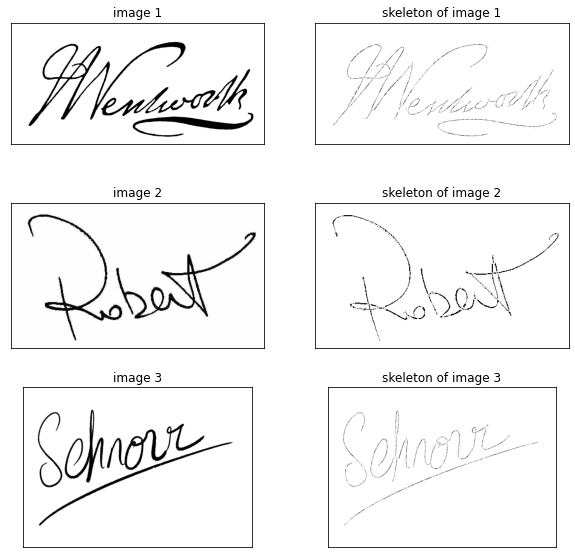

In [4]:
image_list = []

image1 = cv2.imread(os.path.join('images', 'q3a.png'), cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image_list.append([get_skeleton(image1), 'skeleton of image 1','img'])

image2 = cv2.imread(os.path.join('images', 'q3b.jpg'), cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image_list.append([get_skeleton(image2), 'skeleton of image 2','img'])

image3 = cv2.imread(os.path.join('images', 'q3c.png'), cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image_list.append([get_skeleton(image3), 'skeleton of image 3', 'img'])

plotter(image_list, 3, 2, True, 10, 10, 'Q3')

# PART 4

**Point : 30 pts**

Here is for your helper functions(optional).

Please, set your structuring element here:

In [5]:
structuring_element = np.zeros((3,3))

Implement these functions for calculating dilation and erosion in RGB space.

In [6]:
def RGB_dilate(image, structuring_element):
    '''
    Applies dilation in RGB space.
    
    Parameters:
        image (numpy.ndarray): The input image.
        structuring_element (numpy.ndarray): The structuring element must be square.
    
    Returns:
        dilated_image (numpy.ndarray): The dilated result image.   
    '''
    
    img = image.copy()
    dilated_image = image.copy()
    
    #Write your code here
    offset = structuring_element.shape[0]  
    border = int(structuring_element.shape[0]/2)  
    img = cv2.copyMakeBorder(img, border, border, border, border, cv2.BORDER_REPLICATE)
    redImg = img[:,:,0]
    greenImg = img[:,:,1]
    blueImg = img[:,:,2]
    for j in range(0, img.shape[0] - offset):
        for i in range(0, img.shape[1] - offset):
            structuring_element = redImg[i:i+offset, j:j+offset]
            dilated_image[i+border,j+border,0] = structuring_element.max()
            structuring_element = greenImg[i:i+offset, j:j+offset]
            dilated_image[i+border,j+border,1] = structuring_element.max()
            structuring_element = blueImg[i:i+offset, j:j+offset]
            dilated_image[i+border,j+border,2] = structuring_element.max()
    
    return dilated_image

In [7]:
def RGB_erode(image, structuring_element):
    '''
    Applies erosion in RGB space.
    
    Parameters:
        image (numpy.ndarray): The input image.
        structuring_element (numpy.ndarray): The structuring element must be square.
    
    Returns:
        eroded_image (numpy.ndarray): The eroded result image.   
    '''
    
    img = image.copy()
    eroded_image = image.copy()
    
    #Write your code here
    offset = structuring_element.shape[0]  
    border = int(structuring_element.shape[0]/2)  
    img = cv2.copyMakeBorder(img, border, border, border, border, cv2.BORDER_REPLICATE)
    redImg = img[:,:,0]
    greenImg = img[:,:,1]
    blueImg = img[:,:,2]
    for j in range(0, img.shape[0] - offset):
        for i in range(0, img.shape[1] - offset):
            structuring_element = redImg[i:i+offset, j:j+offset]
            eroded_image[i+border,j+border,0] = structuring_element.min()
            structuring_element = greenImg[i:i+offset, j:j+offset]
            eroded_image[i+border,j+border,1] = structuring_element.min()
            structuring_element = blueImg[i:i+offset, j:j+offset]
            eroded_image[i+border,j+border,2] = structuring_element.min()
            
    return eroded_image

In [7]:
structuring_element = np.ones((5,5), np.uint8)

def compute_dilate(args):
    image, offset_x, offset_y, i, j, se_c = args
    if not (offset_x <= i < image.shape[0] - offset_x) or not (offset_y <= j < image.shape[1] - offset_y):
        return 0
    w = image[i - offset_x: i + offset_x + 1, j - offset_y: j + offset_y + 1]
    w[structuring_element == 0] = 0
    return np.max(w)

def your_dilate(image, structuring_element):
    offset_x = structuring_element.shape[0] // 2
    offset_y = structuring_element.shape[1] // 2
    img = np.pad(image, (offset_x, offset_y), 'constant', constant_values=(0, 0))
    se_c = np.sum(structuring_element[structuring_element == 1])
    output = list(map(compute_dilate, ((img, offset_x, offset_y, i, j, se_c) for i in range(img.shape[0]) for j in range(img.shape[1]))))
    result = np.reshape(output, img.shape)
    result = result[offset_x:-offset_x, offset_y:-offset_y]
    assert result.shape == image.shape
    return result

def compute_erode(args):
    image, offset_x, offset_y, i, j, se_c = args
    if not (offset_x <= i < image.shape[0] - offset_x) or not (offset_y <= j < image.shape[1] - offset_y):
        return 0
    w = image[i - offset_x: i + offset_x + 1, j - offset_y: j + offset_y + 1]
    w[structuring_element == 0] = 0
    return np.min(w)

def your_erode(image, structuring_element):
    offset_x = structuring_element.shape[0] // 2
    offset_y = structuring_element.shape[1] // 2
    img = np.pad(image, (offset_x, offset_y), 'constant', constant_values=(255, 255))
    se_c = np.sum(structuring_element[structuring_element == 1])
    output = list(map(compute_erode, ((img, offset_x, offset_y, i, j, se_c) for i in range(img.shape[0]) for j in range(img.shape[1]))))
    result = np.reshape(output, img.shape)
    result = result[offset_x:-offset_x, offset_y:-offset_y]
    assert result.shape == image.shape
    return result

def RGB_dilate(image, structuring_element):
    res = np.zeros(image.shape, np.uint8)
    res[:,:,0] = your_dilate(image[:,:,0], structuring_element)[:,:]
    res[:,:,1] = your_dilate(image[:,:,1], structuring_element)[:,:]
    res[:,:,2] = your_dilate(image[:,:,2], structuring_element)[:,:]
    return res

def RGB_erode(image, structuring_element):
    res = np.zeros(image.shape, np.uint8)
    res[:,:,0] = your_erode(image[:,:,0], structuring_element)[:,:]
    res[:,:,1] = your_erode(image[:,:,1], structuring_element)[:,:]
    res[:,:,2] = your_erode(image[:,:,2], structuring_element)[:,:]
    return res

Test your implementation (don't change this cell).

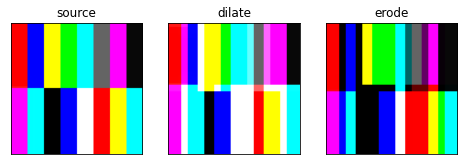

In [8]:
image_list = []
image = cv2.imread(os.path.join('images', 'q4.jpg'), cv2.IMREAD_COLOR)
image_list.append([image, 'source', 'img'])
image_list.append([RGB_dilate(image, structuring_element), 'dilate', 'img'])
image_list.append([RGB_erode(image, structuring_element), 'erode', 'img'])
plotter(image_list, 1, 3, True, 8, 6, 'Q4')

To create proper files for sending in the Quera run this cell, please.

In [9]:
!python notebook_converter.py

End!!!